In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Replace 'your_file.csv' with the actual file path
df = pd.read_excel('jahe merah.xlsx',)

# Display the DataFrame
df.head(5)

,No.,Tanggal,Hari,Nama Produk,Ukuran,Qty,Harga (Rp),Penjual,Via,Keterangan,Pembeli,Usia (Thn),Domisili
0,1,2023-10-09,Senin,Jahe Merah plus Habatussauda,100gr,1,15000,Aji,Online,Done,Bunga,>20,Tangsel
1,2,2023-10-09,Senin,Jahe Merah plus Habatussauda,100gr,1,15000,Aji,Online,Done,aulia,>20,Tangsel
2,3,2023-10-09,Senin,Jahe Merah plus Habatussauda,100gr,1,15000,Mega,Offline,Done,Dayah,20-29,Tangsel
3,4,2023-10-09,Senin,Jahe Merah plus Habatussauda,330gr,1,30000,Mega,Online,Done,Mirrah,30-39,Jakarta
4,5,2023-10-10,Selasa,Jahe Merah plus Habatussauda,330gr,1,30000,Mega,Online,Done,Fenny,30-39,Depok


In [3]:
df1=df.copy()
df1['Product Type']=df['Nama Produk'] + ' ' + df['Ukuran']
df1.head(5)

,No.,Tanggal,Hari,Nama Produk,Ukuran,Qty,Harga (Rp),Penjual,Via,Keterangan,Pembeli,Usia (Thn),Domisili,Product Type
0,1,2023-10-09,Senin,Jahe Merah plus Habatussauda,100gr,1,15000,Aji,Online,Done,Bunga,>20,Tangsel,Jahe Merah plus Habatussauda 100gr
1,2,2023-10-09,Senin,Jahe Merah plus Habatussauda,100gr,1,15000,Aji,Online,Done,aulia,>20,Tangsel,Jahe Merah plus Habatussauda 100gr
2,3,2023-10-09,Senin,Jahe Merah plus Habatussauda,100gr,1,15000,Mega,Offline,Done,Dayah,20-29,Tangsel,Jahe Merah plus Habatussauda 100gr
3,4,2023-10-09,Senin,Jahe Merah plus Habatussauda,330gr,1,30000,Mega,Online,Done,Mirrah,30-39,Jakarta,Jahe Merah plus Habatussauda 330gr
4,5,2023-10-10,Selasa,Jahe Merah plus Habatussauda,330gr,1,30000,Mega,Online,Done,Fenny,30-39,Depok,Jahe Merah plus Habatussauda 330gr


In [4]:
column_names_list = list(df.columns)
print(column_names_list)

['No.', 'Tanggal', 'Hari', 'Nama Produk', 'Ukuran', 'Qty', 'Harga (Rp)', 'Penjual', 'Via', 'Keterangan', 'Pembeli', 'Usia (Thn)', 'Domisili']


In [5]:
sum_by_products= df1.groupby('Product Type')['Harga (Rp)'].sum()
sum_by_products= sum_by_products.sort_values(ascending=False)
sum_by_products

Product Type
Jahe Merah plus Habatussauda 330gr    510000
Jahe Merah plus Habatussauda Botol    410000
Jahe Murni 200gr                      375000
Jahe Merah plus Habatussauda 1kg      320000
Jahe Merah plus Habatussauda 100gr    200000
Kunyit Murni 50gr                     150000
Jahe Murni 50gr                        75000
Temulawak murni 150gr                  65000
Temulawak Manis 330gr                  60000
Jahe Merah plus Habatussauda Gelas     35000
Jahe Merah plus Habatussauda gelas     15000
Name: Harga (Rp), dtype: int64

In [6]:
def grouping(col1, col2):
    if (col2=='Q'):
        grouped_data = df1.groupby(col1)['Qty'].sum()
    else:
        grouped_data = df1.groupby(col1)['Harga (Rp)'].sum()
    grouped_data=grouped_data.sort_values(ascending=False)
    return grouped_data


In [7]:
productT=grouping('Usia (Thn)','H')
productT

Usia (Thn)
40<      555000
30-39    410000
20-29    335000
50<      315000
>20      175000
40-49    155000
30<       50000
Name: Harga (Rp), dtype: int64

<Figure size 1000x600 with 0 Axes>

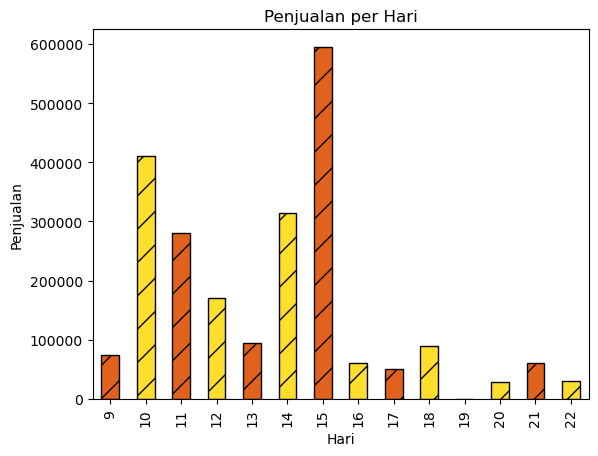

In [8]:
df2=df.copy()

# Set 'Tanggal' column as the index
df2.set_index('Tanggal', inplace=True)

# Resample the data to daily frequency and fill missing dates with 0
resampled_data = df2.resample('D').sum().fillna(0)

resampled_data['Date']=resampled_data.index.day


# Set RGB values for ginger and yellow
ginger_color = '#e1621d'  # RGB for ginger
yellow_color = '#FFDE2E'  # RGB for yellow

bar_colors = [ginger_color, yellow_color]

# Plot the data with specified bar colors
plt.figure(figsize=(10, 6))
resampled_data.plot(kind='bar', x='Date', y='Harga (Rp)', legend=False, color=bar_colors, edgecolor='black', hatch='/')
plt.title('Penjualan per Hari')
plt.xlabel('Hari')
plt.ylabel('Penjualan')
plt.show()